In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Data


## Importing and Reading Data

In [134]:
# data=pd.read_csv("/content/drive/My Drive/CAPSTONE/incident_event_log.csv")
data = pd.read_csv('incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [264]:
data.closed_at.sort_values().head(10)

140542    1/11/2016 15:00
140541    1/11/2016 15:00
140543    1/11/2016 15:00
140544    1/11/2016 15:00
140545    1/11/2016 15:00
140546    1/11/2016 15:00
140547    1/11/2016 15:00
140540    1/11/2016 15:00
140539    1/11/2016 15:00
141358     1/2/2017 09:00
Name: closed_at, dtype: object

In [270]:
open_dt = pd.to_datetime(data.opened_at, format="%d/%m/%Y %H:%M")
close_dt = pd.to_datetime(data.closed_at, format="%d/%m/%Y %H:%M")


In [296]:
data_dup = data.copy()
data_dup['close_dt_conv']=close_dt
data_dup['open_dt_conv']=open_dt

df = data_dup[['number','opened_at','sys_created_at','resolved_at','closed_at', 'open_dt_conv', 'close_dt_conv']]
df_1 = df[df.number=='INC0018372']

df_1 ['diff'] = df_1['close_dt_conv']-df_1['open_dt_conv']
df ['diff'] = df['close_dt_conv']-df['open_dt_conv']

In [297]:
df['diff'].describe()

count                     141712
mean     17 days 01:29:32.070396
std      27 days 03:45:09.260597
min              0 days 00:00:00
25%              5 days 05:07:00
50%              9 days 08:58:00
75%             17 days 09:45:00
max            341 days 06:37:00
Name: diff, dtype: object

In [272]:
df['close_dt_conv'].dt.month

0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
         ..
141682    2
141683    2
141684    2
141685    2
141686    2
141687    2
141688    2
141689    2
141690    2
141691    2
141692    2
141693    2
141694    2
141695    2
141696    2
141697    2
141698    2
141699    2
141700    2
141701    2
141702    2
141703    2
141704    2
141705    2
141706    2
141707    2
141708    2
141709    2
141710    2
141711    2
Name: close_dt_conv, Length: 141712, dtype: int64

## Exploratory Data Analysis

In [135]:
print('The number of rows in the dataset is', data.shape[0])
print('The number of columns in the dataset is', data.shape[1])



The number of rows in the dataset is 141712
The number of columns in the dataset is 36


In [136]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [137]:
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print(numerical_data.shape,categorical_data.shape)
print('The number of rows in the Numerical data is', numerical_data.shape[0])
print('The number of columns in the Numerical data is', numerical_data.shape[1])
print('The number of rows in the Categorical data is', categorical_data.shape[0])
print('The number of columns in the Categorical data is', categorical_data.shape[1])



(141712, 3) (141712, 33)
The number of rows in the Numerical data is 141712
The number of columns in the Numerical data is 3
The number of rows in the Categorical data is 141712
The number of columns in the Categorical data is 33


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

feature:reassignment_count


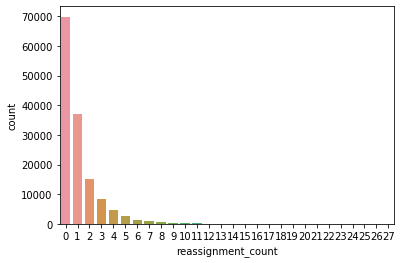

feature:reopen_count


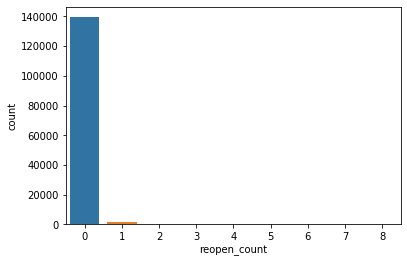

feature:sys_mod_count


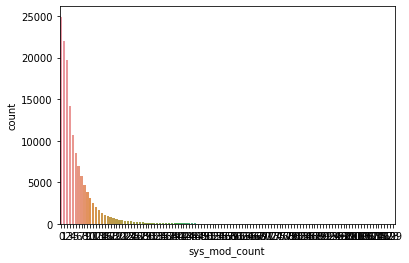

In [139]:
for i in numerical_data:
    if len(data[i].unique()):
        print(f"feature:{i}")
        sns.countplot(data[i])
        plt.show()
        

In [140]:
for i in categorical_data:
    print(i)
    print('Number of Categories in',i, 'is', data[i].nunique() )
    print(data[i].value_counts()/data.shape[0]*100)
    print('*'*50)

number
Number of Categories in number is 24918
INC0019396    0.040928
INC0044260    0.039517
INC0005927    0.032460
INC0020718    0.031755
INC0011206    0.031049
INC0025734    0.030343
INC0007349    0.030343
INC0012815    0.028226
INC0032450    0.026815
INC0003419    0.026815
INC0020849    0.026815
INC0015902    0.026109
INC0002129    0.025404
INC0019739    0.024698
INC0010322    0.023992
INC0007229    0.023287
INC0004305    0.023287
INC0009986    0.023287
INC0025696    0.023287
INC0026226    0.023287
INC0003256    0.023287
INC0031099    0.022581
INC0025234    0.022581
INC0012879    0.022581
INC0011262    0.022581
INC0003982    0.021875
INC0025993    0.021875
INC0020627    0.021875
INC0012895    0.021875
INC0004210    0.021170
                ...   
INC0026966    0.001411
INC0021035    0.001411
INC0028051    0.001411
INC0029461    0.001411
INC0022432    0.001411
INC0013463    0.001411
INC0013790    0.001411
INC0011697    0.001411
INC0024538    0.001411
INC0004406    0.001411
INC0007987

?                  37.453427
4/7/2016 14:50      0.039517
15/3/2016 15:19     0.036694
19/4/2016 11:32     0.033166
24/5/2016 09:14     0.033166
4/3/2016 10:31      0.032460
10/3/2016 09:39     0.031049
3/3/2016 16:23      0.028932
7/3/2016 10:40      0.028932
23/3/2016 08:57     0.028932
15/3/2016 13:59     0.028226
30/3/2016 08:23     0.028226
19/5/2016 09:09     0.027521
7/3/2016 12:02      0.026815
7/3/2016 09:25      0.026815
7/3/2016 11:17      0.026815
7/3/2016 13:49      0.026815
6/4/2016 14:31      0.026109
3/3/2016 16:47      0.025404
3/3/2016 17:16      0.025404
8/3/2016 08:58      0.025404
7/3/2016 15:38      0.024698
4/3/2016 14:46      0.024698
15/3/2016 10:55     0.024698
31/3/2016 08:36     0.024698
21/3/2016 09:46     0.024698
30/5/2016 08:16     0.024698
17/3/2016 17:56     0.023992
29/2/2016 09:13     0.023992
23/5/2016 14:54     0.023992
                     ...    
20/4/2016 15:29     0.001411
19/4/2016 16:26     0.001411
27/3/2016 18:29     0.001411
9/3/2016 08:54

Name: category, dtype: float64
**************************************************
subcategory
Number of Categories in subcategory is 255
Subcategory 174    25.251919
Subcategory 223    11.006831
Subcategory 175     7.406571
Subcategory 164     5.560574
Subcategory 9       2.910128
Subcategory 275     2.570707
Subcategory 135     2.446511
Subcategory 170     2.363244
Subcategory 36      2.058400
Subcategory 75      1.491052
Subcategory 125     1.373913
Subcategory 3       1.261714
Subcategory 43      1.181269
Subcategory 150     1.170684
Subcategory 28      1.104352
Subcategory 303     1.099413
Subcategory 114     1.090945
Subcategory 103     1.070481
Subcategory 123     1.005561
Subcategory 154     0.825618
Subcategory 44      0.810799
Subcategory 251     0.764226
Subcategory 29      0.707774
Subcategory 31      0.686604
Subcategory 300     0.656261
Subcategory 163     0.632974
Subcategory 231     0.604748
Subcategory 200     0.558880
Subcategory 16      0.544767
Subcategory 185     0.

?                  98.380518
Problem ID  14      0.129841
Problem ID  2       0.103732
Problem ID  52      0.057864
Problem ID  239     0.033872
Problem ID  95      0.028226
Problem ID  213     0.023992
Problem ID  32      0.023287
Problem ID  7       0.020464
Problem ID  64      0.019758
Problem ID  190     0.018347
Problem ID  25      0.016936
Problem ID  144     0.014819
Problem ID  119     0.014819
Problem ID  110     0.014819
Problem ID  17      0.014113
Problem ID  154     0.012702
Problem ID  141     0.011996
Problem ID  21      0.011291
Problem ID  137     0.011291
Problem ID  10      0.011291
Problem ID  165     0.010585
Problem ID  228     0.010585
Problem ID  135     0.010585
Problem ID  63      0.010585
Problem ID  51      0.010585
Problem ID  125     0.009879
Problem ID  166     0.009879
Problem ID  91      0.009879
Problem ID  68      0.009879
                     ...    
Problem ID  133     0.001411
Problem ID  62      0.001411
Problem ID  196     0.001411
Problem ID  11

24/3/2016 18:59    2.345602
24/3/2016 18:50    2.008299
24/3/2016 18:40    1.981484
24/3/2016 19:00    1.961725
24/3/2016 19:01    1.442362
24/3/2016 18:51    1.419075
24/3/2016 18:41    1.323812
24/3/2016 19:02    0.729649
23/5/2016 11:07    0.494665
24/3/2016 18:52    0.372587
27/3/2016 09:59    0.347889
27/3/2016 11:59    0.345772
8/6/2016 17:07     0.332364
3/4/2016 16:59     0.328130
17/5/2016 16:07    0.319662
28/3/2016 15:59    0.318251
28/3/2016 10:59    0.303432
27/3/2016 15:59    0.295670
28/3/2016 14:59    0.283674
10/4/2016 16:59    0.269561
5/4/2016 10:59     0.267444
27/3/2016 14:59    0.263916
9/4/2016 11:59     0.261093
4/4/2016 10:59     0.255448
13/4/2016 15:59    0.249097
3/5/2016 12:07     0.244863
11/4/2016 15:59    0.244863
11/4/2016 09:59    0.244157
12/4/2016 11:59    0.239923
25/4/2016 10:07    0.238512
                     ...   
31/5/2016 01:07    0.001411
9/5/2016 13:10     0.001411
6/5/2016 04:10     0.001411
5/3/2016 11:00     0.001411
5/5/2016 21:07     0

### Null Values Treatment

In [141]:
data.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [142]:
data = data.replace('?',np.nan)
print('The Null Values present in the data are: ')
data.isnull().sum()[data.isnull().sum()>0]

The Null Values present in the data are: 


caller_id               29
opened_by             4835
sys_created_by       53076
sys_created_at       53076
location                76
category                78
subcategory            111
u_symptom            32964
cmdb_ci             141267
assignment_group     14213
assigned_to          27496
problem_id          139417
rfc                 140721
vendor              141468
caused_by           141689
closed_code            714
resolved_by            226
resolved_at           3141
dtype: int64

In [143]:
missing_val_per=round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)
missing_val_per



caused_by                  99.98
vendor                     99.83
cmdb_ci                    99.69
rfc                        99.30
problem_id                 98.38
sys_created_at             37.45
sys_created_by             37.45
u_symptom                  23.26
assigned_to                19.40
assignment_group           10.03
opened_by                   3.41
resolved_at                 2.22
closed_code                 0.50
resolved_by                 0.16
subcategory                 0.08
category                    0.06
location                    0.05
caller_id                   0.02
reassignment_count          0.00
active                      0.00
incident_state              0.00
reopen_count                0.00
sys_mod_count               0.00
made_sla                    0.00
opened_at                   0.00
closed_at                   0.00
sys_updated_by              0.00
sys_updated_at              0.00
contact_type                0.00
impact                      0.00
urgency   

In [300]:
data1 = data.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id','sys_created_at','sys_created_by'],axis=1)

In [301]:
data1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [302]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per



u_symptom                  23.26
assigned_to                19.40
assignment_group           10.03
opened_by                   3.41
resolved_at                 2.22
closed_code                 0.50
resolved_by                 0.16
subcategory                 0.08
category                    0.06
location                    0.05
caller_id                   0.02
opened_at                   0.00
sys_mod_count               0.00
made_sla                    0.00
reassignment_count          0.00
active                      0.00
incident_state              0.00
reopen_count                0.00
closed_at                   0.00
sys_updated_by              0.00
sys_updated_at              0.00
contact_type                0.00
impact                      0.00
urgency                     0.00
priority                    0.00
knowledge                   0.00
u_priority_confirmation     0.00
notify                      0.00
number                      0.00
dtype: float64

In [303]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 3) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 3
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


In [304]:
for i in ['u_symptom','assigned_to','assignment_group','opened_by','closed_code','resolved_by','subcategory','category','location','caller_id']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])
    

In [305]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per

resolved_at                2.22
closed_at                  0.00
location                   0.00
incident_state             0.00
active                     0.00
reassignment_count         0.00
reopen_count               0.00
sys_mod_count              0.00
made_sla                   0.00
caller_id                  0.00
opened_by                  0.00
opened_at                  0.00
sys_updated_by             0.00
sys_updated_at             0.00
contact_type               0.00
category                   0.00
subcategory                0.00
u_symptom                  0.00
impact                     0.00
urgency                    0.00
priority                   0.00
assignment_group           0.00
assigned_to                0.00
knowledge                  0.00
u_priority_confirmation    0.00
notify                     0.00
closed_code                0.00
resolved_by                0.00
number                     0.00
dtype: float64

In [306]:
data1['resolved_at'].fillna(method='ffill', inplace=True)

In [307]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per

closed_at                  0.0
location                   0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
category                   0.0
resolved_at                0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
closed_code                0.0
resolved_by                0.0
number                     0.0
dtype: float64

In [284]:
# here we see a lot of columns which are actually dates but not categories

dates = ['sys_updated_at', 'opened_at', 'resolved_at', 'closed_at']




# updating datatype of the date columns

for feat in dates:
    data1[feat] = pd.to_datetime(data1[feat], format='%Y-%m-%d %H:%M')
#     data1[feat] = data1[feat].dt.strftime('%Y-%m-%d %H:%M')


# check their new datataype    
data1[dates].dtypes

sys_updated_at    object
opened_at         object
resolved_at       object
closed_at         object
dtype: object

In [293]:
data1['closed_at'] = pd.to_datetime(data1['closed_at'])

data1['closed_at'] = data1['closed_at'].dt.strftime('%Y-%m-%d %H:%M')



In [291]:
data1['closed_at'] = pd.to_datetime(data1['closed_at'])

data1['closed_at'] = data1['closed_at'].dt.strftime('%Y-%m-%d %H:%M')

### Outliers

In [111]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 3) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 3
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


reassignment_count


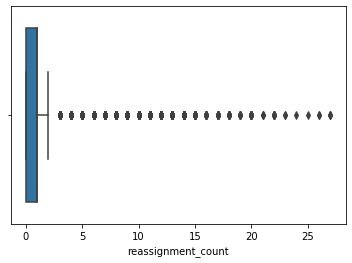

**************************************************
reopen_count


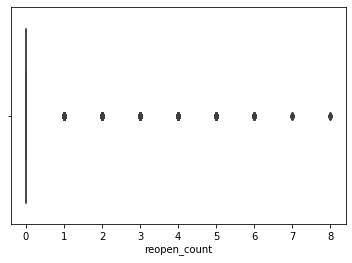

**************************************************
sys_mod_count


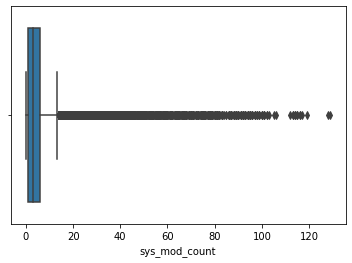

**************************************************


In [104]:
for i in numerical_data1:
    print(i)
    sns.boxplot(data1[i])
    plt.show()
    print('*'*50)

In [96]:
def outlier_treatment(x):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    iqr = q3-q1


    x[x>(q3+1.5*iqr)] = (q3+1.5*iqr)
    x[x<(q1-1.5*iqr)] = (q1-1.5*iqr)
    
    return x

In [97]:
numerical_data2 = numerical_data1.copy()

for _ in numerical_data2.columns:
    numerical_data2[_] = outlier_treatment(numerical_data2[_])


In [106]:
numerical_data1.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [108]:
numerical_data1.reassignment_count[numerical_data1.reassignment_count>15].shape

(87,)

## Transforming data:

In [308]:
data1['reassignment_count'] = np.power(data1['reassignment_count'], 1/2)
# data1['reopen_count'] = outlier_treatment(data1['reopen_count'])
data1['sys_mod_count'] = np.power(data1['sys_mod_count'], 1/2)

# data1.plot(kind='box')

reassignment_count


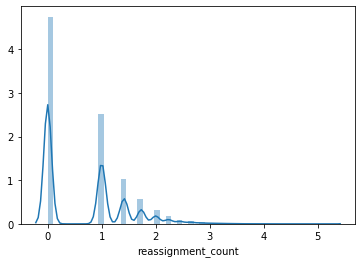

**************************************************
reopen_count


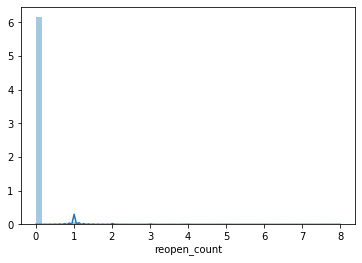

**************************************************
sys_mod_count


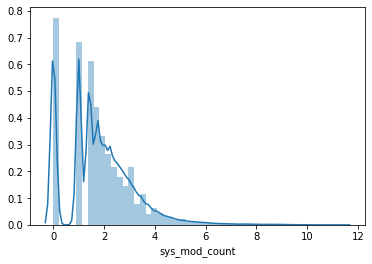

**************************************************


In [113]:
for i in numerical_data1.columns:
    print(i)
    sns.distplot(numerical_data1[i])
    plt.show()
    print('*'*50)

In [ ]:
data1

reassignment_count


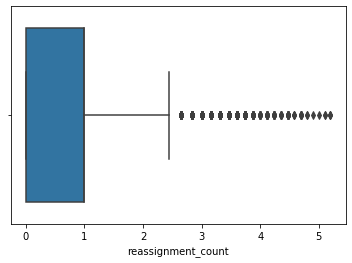

**************************************************
reopen_count


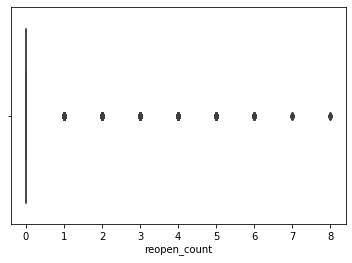

**************************************************
sys_mod_count


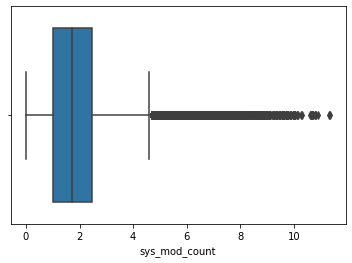

**************************************************


In [114]:
for i in numerical_data1.columns:
    print(i)
    sns.boxplot(numerical_data1[i])
    plt.show()
    print('*'*50)

In [154]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null float64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null float64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null datetime64[ns]
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null object
u_symptom                  141712 non-null object
impact                    

reassignment_count
skewness : 3.1117242166500447


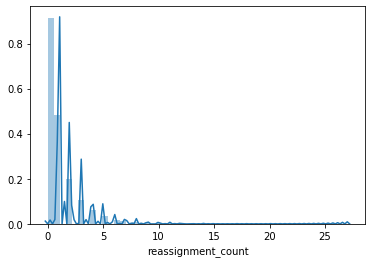

**************************************************
reopen_count
skewness : 15.56360442759793


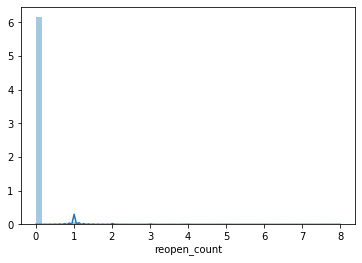

**************************************************
sys_mod_count
skewness : 4.74289730354474


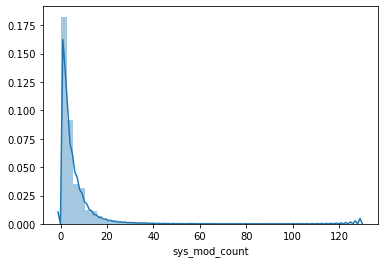

**************************************************


In [101]:
for i in numerical_data1:
    print(i)
    print('skewness :',data1[i].skew())
    sns.distplot(data1[i])
    plt.show()
    print('*'*50)

In [309]:
data1['opened_at'] = pd.to_datetime(data1.opened_at, format="%d/%m/%Y %H:%M")
data1['closed_at'] = pd.to_datetime(data1.closed_at, format="%d/%m/%Y %H:%M")

In [311]:
# data1.opened_at.value_counts()

## Creatin new target (SLA timeline)

In [359]:
# data1['predicted_closed_time'] = data1.closed_at- data1.opened_at
# data1['predicted_closed_days']=data1['predicted_closed_time'].dt.total_seconds()/ (24 * 60 * 60)

data1['predicted_closed_days']=(data1.closed_at- data1.opened_at).dt.total_seconds()/ (24 * 60 * 60)
data1['predicted_closed_days'].describe()

count    141712.000000
mean         17.062177
std          27.156357
min           0.000000
25%           5.213194
50%           9.373611
75%          17.406250
max         341.275694
Name: predicted_closed_days, dtype: float64

In [361]:
# data1 = data1.drop('predicted_closed_time', axis=1)

In [363]:
feat_cat = data1.select_dtypes('object').columns.tolist()
feat_num = ['reassignment_count', 'reopen_count', 'sys_mod_count']

In [364]:
feat_category = data1[feat_cat].nunique()[data1[feat_cat].nunique()<=25].index.tolist()
feat_others = data1[feat_cat].nunique()[data1[feat_cat].nunique()>25].index.tolist()

In [365]:
feat_category_nominal = ['incident_state', 'contact_type', 'notify', 'closed_code']

feat_category_ordinal = set(feat_cat).difference(set(feat_category_nominal))



In [366]:
# applying label encoding to ordinal data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2_ordinal = data1[feat_category_ordinal].apply(le.fit_transform)


In [367]:
# appying one hot encoding to nominal data

data2_nominal = pd.get_dummies(data1[feat_category_nominal], drop_first=True)


In [368]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data2_num_scaled = ss.fit_transform(data1[feat_num])

data2_num_scaled = pd.DataFrame(data2_num_scaled, columns=feat_num)

In [370]:
# getting all dates data
data2_dates = data1[['sys_updated_at', 'opened_at', 'predicted_closed_days']]

In [371]:
data_final = pd.concat([data2_nominal, data2_ordinal, data2_num_scaled, data2_dates], axis=1)
data_final.head()

,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,contact_type_Email,contact_type_IVR,...,opened_by,impact,resolved_by,category,reassignment_count,reopen_count,sys_mod_count,sys_updated_at,opened_at,predicted_closed_days
0,0,0,0,0,0,0,1,0,0,0,...,200,1,51,46,-0.896264,-0.105729,-1.343676,29/2/2016 01:23,2016-02-29 01:16:00,5.447222
1,0,0,0,0,0,0,0,1,0,0,...,200,1,51,46,-0.896264,-0.105729,-0.292815,29/2/2016 08:53,2016-02-29 01:16:00,5.447222
2,0,0,0,0,0,0,0,1,0,0,...,200,1,51,46,-0.896264,-0.105729,-0.056640,29/2/2016 11:29,2016-02-29 01:16:00,5.447222
3,0,0,0,0,0,1,0,0,0,0,...,200,1,51,46,-0.896264,-0.105729,0.142465,5/3/2016 12:00,2016-02-29 01:16:00,5.447222
4,0,0,0,0,0,0,1,0,0,0,...,120,1,196,30,-0.896264,-0.105729,-1.343676,29/2/2016 04:57,2016-02-29 04:40:00,6.222222


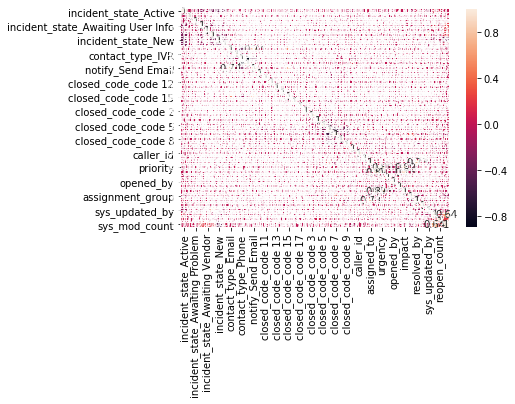

In [210]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data2 = data1[].apply(le.fit_transform)
# plt.figure(figsize = (24,16))
sns.heatmap(data_final.corr(),annot=True)
plt.show()

In [211]:
data_final.head()

,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,contact_type_Email,contact_type_IVR,...,assignment_group,resolved_by,category,sys_updated_by,reassignment_count,reopen_count,sys_mod_count,sys_updated_at,opened_at,predicted_closed_time
0,0,0,0,0,0,0,1,0,0,0,...,47,51,46,104,-0.896264,-0.105729,-1.343676,2016-02-29 01:23:00,2016-02-29 01:16:00,64 days 10:44:00
1,0,0,0,0,0,0,0,1,0,0,...,47,51,46,509,-0.896264,-0.105729,-0.292815,2016-02-29 08:53:00,2016-02-29 01:16:00,64 days 10:44:00
2,0,0,0,0,0,0,0,1,0,0,...,47,51,46,658,-0.896264,-0.105729,-0.056640,2016-02-29 11:29:00,2016-02-29 01:16:00,64 days 10:44:00
3,0,0,0,0,0,1,0,0,0,0,...,47,51,46,762,-0.896264,-0.105729,0.142465,2016-05-03 12:00:00,2016-02-29 01:16:00,64 days 10:44:00
4,0,0,0,0,0,0,1,0,0,0,...,63,196,30,605,-0.896264,-0.105729,-1.343676,2016-02-29 04:57:00,2016-02-29 04:40:00,95 days 05:20:00


In [212]:
abs(data2.corr()['closed_at']).sort_values(ascending = False)

closed_at                  1.000000
predicted_closed_time      0.673939
number                     0.394183
knowledge                  0.221325
sys_updated_at             0.199160
resolved_at                0.175077
sys_mod_count              0.102901
u_priority_confirmation    0.096697
opened_by                  0.085908
contact_type               0.084195
made_sla                   0.047021
closed_code                0.046388
subcategory                0.028581
notify                     0.028488
resolved_by                0.025450
assignment_group           0.023928
incident_state             0.023365
opened_at                  0.017223
reopen_count               0.015256
location                   0.014045
urgency                    0.013942
assigned_to                0.013353
priority                   0.012586
impact                     0.012080
sys_updated_by             0.011282
caller_id                  0.006058
reassignment_count         0.004051
active                     0

In [213]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 4) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 4
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


In [120]:
from scipy.stats import chi2_contingency

In [121]:
categorical_datadrop=categorical_data1.drop('closed_at',axis=1)

In [122]:
non_sigificant=[]
for i in categorical_datadrop:
    print(i)
    print('H0:',i, 'is not significant to closed_at')
    print('Ha:',i,'is significant to closed_at')
    obs = pd.crosstab(data2[i],data2['closed_at'])
    chi, p_val, ddof, expected = chi2_contingency(obs)
    print('pval : ', p_val)
    if p_val<0.05:
        print('We are rejecting the null hypothesis', i , 'is significant to closed_at\n')
    else:
        print('We are accepting the null hypothesis', i, 'is not significant to closed_at\n')
        non_sigificant.append(i)
print('The Varible not significant to closed_at is', non_sigificant)

number
H0: number is not significant to closed_at
Ha: number is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis number is significant to closed_at

incident_state
H0: incident_state is not significant to closed_at
Ha: incident_state is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis incident_state is significant to closed_at

active
H0: active is not significant to closed_at
Ha: active is significant to closed_at
pval :  0.9038401186262924
We are accepting the null hypothesis active is not significant to closed_at

made_sla
H0: made_sla is not significant to closed_at
Ha: made_sla is significant to closed_at
pval :  4.701477931610207e-205
We are rejecting the null hypothesis made_sla is significant to closed_at

caller_id
H0: caller_id is not significant to closed_at
Ha: caller_id is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis caller_id is significant to closed_at

opened_by
H0: opened_by is not significa

In [ ]:
data

In [322]:
X=data2.drop("closed_at",axis=1)
y=data2["closed_at"]

In [126]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({"vif":vif[1:]},index=X.columns).T

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at
vif,1.773509,1.283972,2.271218,1.458181,1.10522,1.602128,1.613887,1.006735,1.05212,1.441351,...,5.143297,10.362985,1.094129,2.208014,1.858746,1.825191,1.311205,1.021941,2.179713,1.290851


In [329]:
df = data1[['number','opened_at', 'closed_at', 'predicted_closed_time', 'resolved_at', 'sys_updated_at', 'incident_state']]

count    141712.000000
mean         17.062177
std          27.156357
min           0.000000
25%           5.213194
50%           9.373611
75%          17.406250
max         341.275694
Name: predicted_closed_days, dtype: float64

In [357]:
data_final.head(2)

,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,contact_type_Email,contact_type_IVR,...,opened_by,impact,resolved_by,category,reassignment_count,reopen_count,sys_mod_count,sys_updated_at,opened_at,predicted_closed_time
0,0,0,0,0,0,0,1,0,0,0,...,200,1,51,46,-0.896264,-0.105729,-1.343676,29/2/2016 01:23,2016-02-29 01:16:00,5 days 10:44:00
1,0,0,0,0,0,0,0,1,0,0,...,200,1,51,46,-0.896264,-0.105729,-0.292815,29/2/2016 08:53,2016-02-29 01:16:00,5 days 10:44:00


In [373]:
X=data_final.drop(["predicted_closed_days", 'opened_at', 'sys_updated_at'],axis=1)
y=data_final["predicted_closed_days"]

In [324]:
type(X_constant), type(y), type(X)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [374]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.349
Model:                               OLS   Adj. R-squared:                  0.349
Method:                    Least Squares   F-statistic:                     1617.
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                           15:54:50   Log-Likelihood:            -6.3853e+05
No. Observations:                 141712   AIC:                         1.277e+06
Df Residuals:                     141664   BIC:                         1.278e+06
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                16.3358     11.526      1.417      0.156      -6.255      38.927
incident_state_Active                -7.8304      9.803     -0.799      0.424     -27.044      11.383
incident_state_Awaiting Evidence     55.6171     10.429      5.333      0.000      35.176      76.059
incident_state_Awaiting Problem       4.3536      9.856      0.442      0.659     -14.963      23.670
incident_state_Awaiting User Info   -13.0184      9.804     -1.328      0.184     -32.234       6.197
incident_state_Awaiting Vendor       50.1033      9.837      5.093      0.000      30.822      69.385
incident_state_Closed               -23.7163      9.803     -2.419      0.016     -42.930      -4.502
incident_state_New                   -0.1186      9.804     -0.012      0.990     -19.333      19.096
incident_state_Resolved             -17.8476      9.803     -1.821      0.069     -37.061       1.366
contact_type_Email                   -1.6703      6.409     -0.261      0.794     -14.231      10.891
contact_type_IVR                    -11.7354      7.952     -1.476      0.140     -27.321       3.850
contact_type_Phone                   -1.6123      6.028     -0.267      0.789     -13.428      10.203
contact_type_Self service            -1.1277      6.068     -0.186      0.853     -13.022      10.766
notify_Send Email                    -1.6777      3.262     -0.514      0.607      -8.072       4.716
closed_code_code 10                   1.3473      0.661      2.040      0.041       0.053       2.642
closed_code_code 11                  -0.9573      0.688     -1.392      0.164      -2.306       0.391
closed_code_code 12                  -8.2243      6.902     -1.191      0.233     -21.753       5.304
closed_code_code 13                  23.3954      2.881      8.121      0.000      17.749      29.042
closed_code_code 14                   2.7899      6.340      0.440      0.660      -9.636      15.216
closed_code_code 15                   0.4357      1.988      0.219      0.827      -3.460       4.332
closed_code_code 16                  -0.0923      0.776     -0.119      0.905      -1.614       1.429
closed_code_code 17                  -5.9610      2.080     -2.865      0.004     -10.038      -1.884
closed_code_code 2                    0.8648      1.236      0.700      0.484      -1.558       3.288
closed_code_code 3                   -1.4333      0.970     -1.478      0.139      -3.334       0.468
closed_code_code 4                    4.5719      0.761      6.008      0.000       3.080       6.063
closed_code_code 5                   -2.6807      0.510     -5.259      0.000      -3.680      -1.682
closed_code_code 6                    0.8103      0.395      2.049      0.040       0.035   

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({"vif":vif[1:]},index=X.columns).T

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at
vif,1.773509,1.283972,2.271218,1.458181,1.10522,1.602128,1.613887,1.006735,1.05212,1.441351,...,5.143297,10.362985,1.094129,2.208014,1.858746,1.825191,1.311205,1.021941,2.179713,1.290851
